David Giacobbi  
Class: CPSC 222, Spring 2022  
Data Assignment #6  
4/12/22 

# SciPy Hypothesis Testing Exercises

The following hypothesis testing will utilize the Python `scipy` library to formulate and make decisions about various topics around Gonzaga today. The five tests will work with datasets such as:

1. DA5 Patient Cleaned Data
1. Ed Activity for CPSC 222 and CPSC 322
1. IQ1 Quiz Durations
1. Circuit Trials for Physical Therapy
1. Daily Visitors on Gonzaga's Website (2018-2022)

## DA5 Gender Stroke Age Hypothesis Test

The first hypothesis test will ask the question: Is the mean age of women who had a stroke greater than the mean age of men who had a stroke? This test will have a level of significance of 0.01. The male and female datasets will need to be uploaded from the csv file for analysis:

In [2]:
import pandas as pd

patient_df = pd.read_csv("DA5_patient_data_cleaned.csv")
male_stroke_age = []
female_stroke_age = []

for i in range(len(patient_df)):
    
    if patient_df.loc[i]["RIC"] == "Stroke":

        if patient_df.loc[i]["Gender"] == "M":
            male_stroke_age.append(patient_df.loc[i]["Age"])

        if patient_df.loc[i]["Gender"] == "F":
            female_stroke_age.append(patient_df.loc[i]["Age"])

print("Male Stroke Dataset n:", len(male_stroke_age))
print("Female Stroke Dataset n:", len(female_stroke_age))

male_stroke_age_ser = pd.Series(male_stroke_age)
female_stroke_age_ser = pd.Series(female_stroke_age)

Male Stroke Dataset n: 607
Female Stroke Dataset n: 562


### 1. Identify the Null and Alternative Hypothesis

$H_o$ = $\mu_{female}$ <= $\mu_{male}$  
$H_1$ = $\mu_{female}$ > $\mu_{male}$  
$\mu$ = average age of stroke patient group

### 2. Select Level of Significance

$\alpha$ = 0.01

### 3. Select Appropriate Test Statistic

T-Statistic for Two-Sample Independent Test of Means:
$$t = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{s^2_p(\frac{1}{n_1} + \frac{1}{n_2})}}$$

Pooled Variance:
$$s^2_p = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$

Degrees of Freedom:
$$df = n_1 + n_2 - 1$$

T-Critical @ $\alpha = 0.01$ and $df = 1167$
$$t_{critical} = 2.3295$$

In [3]:
from scipy import stats

t, pval = stats.ttest_ind(female_stroke_age_ser, male_stroke_age_ser)
pval /= 2
print("t:", t, "pval:", pval)

t: 3.0212409378467506 pval: 0.0012861144659843757


### 4. Formulate a Decision Rule

Using the t-distribution table with the level of significance (0.01) and the degrees of freedom (1167), the t-critical value for this hypothesis test is 2.492. The decision rule can be checked using the computed t-value or p-value. The following conditions can be drawn up using the initial hypotheses:

1. If t-computed > 2.3295, reject $H_o$.
1. If t-computed <= 2.3295, do not reject $H_o$.

Python logic can demonstrate the above tests:

In [4]:
if t > 2.3295:
    print("Reject Null Hypothesis")
else:
    print("Do Not Reject Null Hypothesis")

Reject Null Hypothesis


### 5. Make a Decision

At 0.01 level of significance, the hypothesis that female patients have a lower or equal average mean than male patients can be rejected. This implies that there is evidence that can support the conclusion that the average male stroke age is lower than the average female stroke age in this sample set.

## Ed Discussion: CPSC 222 v. CPSC 322

The next hypothesis test will utilize JSON files to pose the question: Is there a difference in the number of days CPSC 222 students are active on Ed discussion compared to CPSC 322 students? A level of significance of 0.001 will be used for this test along with a two-tailed, two independent sample test of means. 

The following code will parse the JSON file and create the two datasets of each class's "Days Active" on Ed:

In [5]:
import pandas as pd

ed_222_df = pd.read_json("ed_222.json")
activity_222_ser = pd.Series(ed_222_df["Days Active"])

ed_322_df = pd.read_json("ed_322.json")
activity_322_ser = pd.Series(ed_322_df["Days Active"])

print("CPSC 222 Activity n:", len(activity_222_ser))
print("CPSC 322 Activity n:", len(activity_322_ser))


CPSC 222 Activity n: 32
CPSC 322 Activity n: 62


### 1. Identify the Null and Alternative Hypothesis

$H_o$ = $\mu_{322} = \mu_{222}$  
$H_1$ = $\mu_{322} \neq \mu_{222}$  
$\mu$ = average days active on Ed per student

### 2. Select Level of Significance

$\alpha$ = 0.001

### 3. Select Appropriate Test Statistic

T-Statistic for Two-Sample Independent Test of Means:
$$t = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{s^2_p(\frac{1}{n_1} + \frac{1}{n_2})}}$$

Pooled Variance:
$$s^2_p = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$

Degrees of Freedom:
$$df = n_1 + n_2 - 1$$

T-Critical @ $\alpha = 0.001$ and $df = 92$
$$t_{critical} = \pm 3.3994$$

In [6]:
from scipy import stats

t, pval = stats.ttest_ind(activity_322_ser, activity_222_ser)
pval /= 2
print("t:", t, "pval:", pval)

t: 5.487771363199516 pval: 1.7842247003494743e-07


### 4. Formulate a Decision Rule

Using the t-distribution table with the level of significance (0.001) and the degrees of freedom (92), the t-critical value for this hypothesis test is 3.1812. The decision rule can be checked using the computed t-value or p-value. The following conditions can be drawn up using the initial hypotheses:

1. If t-computed < -3.3994 or t-computed > 3.3994, reject $H_o$.
1. If -3.3994 <= t-computed <= 3.3994, do not reject $H_o$.

Python logic can demonstrate the above tests:

In [7]:
if t < -3.3994 or t > 3.3994:
    print("Reject the Null Hypothesis")
if t >= -3.3994 and t <= 3.3994:
    print("Do Not Reject the Null Hypothesis")

Reject the Null Hypothesis


### 5. Make a Decision

At level 0.001 significance, the hypothesis that the average days active on Ed per student is equal must be rejected. This means that there is evidence that supports the conclusion that there is a difference in the number of days 222 students are active on Ed compared to 322 students.

### IQ1 Quiz Durations: Remote v. Classroom

This hypothesis will parse through a csv file to compare the quiz durations of students who completed IQ remotely compared to in the classroom. Using a one-tailed, two independent sample means test, the following question can be answered: Is the mean quiz duration for remote students greater than the mean quiz duration of students who took the quiz in the classroom? A level of significance of 0.005 will be used.

The following Python code parses through the `"IQ1_quiz_durations.csv"` and organizes them into two Pandas series for testing.

In [8]:
import pandas as pd

IQ_quiz_duration_df = pd.read_csv("IQ1_quiz_durations.csv")
remote_duration_list = []
classroom_duration_list = []

for i in range(len(IQ_quiz_duration_df)):

    if IQ_quiz_duration_df.loc[i]["In-person"] == 0:
        remote_duration_list.append(IQ_quiz_duration_df.loc[i]["Hours Start to Finish"])

    elif IQ_quiz_duration_df.loc[i]["In-person"] == 1:
        classroom_duration_list.append(IQ_quiz_duration_df.loc[i]["Hours Start to Finish"])

remote_duration_ser = pd.Series(remote_duration_list)
classroom_duration_ser = pd.Series(classroom_duration_list)

print("Remote Duration n:", len(remote_duration_ser))
print("Classroom Duration n:", len(classroom_duration_ser))

Remote Duration n: 48
Classroom Duration n: 46


### 1. Identify the Null and Alternative Hypothesis

$H_o$ = $\mu_{remote}$ <= $\mu_{classroom}$  
$H_1$ = $\mu_{remote}$ > $\mu_{classroom}$  
$\mu$ = average quiz duration per student (in hours)

### 2. Select Level of Significance

$\alpha$ = 0.005

### 3. Select Appropriate Test Statistic

T-Statistic for Two-Sample Independent Test of Means:
$$t = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{s^2_p(\frac{1}{n_1} + \frac{1}{n_2})}}$$

Pooled Variance:
$$s^2_p = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$

Degrees of Freedom:
$$df = n_1 + n_2 - 1$$

T-Critical @ $\alpha = 0.005$ and $df = 92$
$$t_{critical} = 2.6303$$

In [9]:
from scipy import stats

t, pval = stats.ttest_ind(remote_duration_ser, classroom_duration_ser)
pval /= 2
print("t:", t, "pval:", pval)

t: 4.12720417112991 pval: 4.029306042293943e-05


### 4. Formulate a Decision Rule

Using the t-distribution table with the level of significance (0.005) and the degrees of freedom (92), the t-critical value for this hypothesis test is 2.6303. The decision rule can be checked using the computed t-value or p-value. The following conditions can be drawn up using the initial hypotheses:

1. If t-computed > 2.6303, reject $H_o$.
1. If t-computed <= 2.6303, do not reject $H_o$.

Python logic can demonstrate the above tests:

In [10]:
if t > 2.6303:
    print("Reject the Null Hypothesis")
elif t <= 2.6303:
    print("Do Not Reject the Null Hypothesis")

Reject the Null Hypothesis


### 5. Make a Decision

At level 0.005 significance, the hypothesis that the mean quiz duration of remote students is less than or equal than the mean quiz duration of classroom students must be rejected. This provides evidence that supports the conclusion that the average quiz duration of remote students is greater than that of classroom students.

## Circuit Durations: Trial Comparisons

The next hypothesis test compares the test results of physical therapy patients. Trial A was completed before therapy services were administered while Trial B was completed a week after therapy services. The following data samples will be tested to answer the question: Is the mean circuit duration for subjects at Trial B less than it was at Trial A? Such a conclusion would imply that the subject completed the circuit faster after therapy. A level of significance of 0.01 will be used.

The following data will be parsed from the `"circuit_trials.csv"` file in Python below:

In [11]:
import pandas as pd

circuit_trials_df = pd.read_csv("circuit_trials.csv")
trial_a_list = []
trial_b_list = []


for i in range(len(circuit_trials_df)):

    if circuit_trials_df.loc[i]["Trial ID"] == 'A':
        trial_a_list.append(circuit_trials_df.loc[i]["Duration"])

    elif circuit_trials_df.loc[i]["Trial ID"] == 'B':
        trial_b_list.append(circuit_trials_df.loc[i]["Duration"])

trial_a_ser = pd.Series(trial_a_list)
trial_b_ser = pd.Series(trial_b_list)

print("Trial A n:", len(trial_a_ser))
print("Trial B n:", len(trial_b_ser))

Trial A n: 27
Trial B n: 27


### 1. Identify the Null and Alternative Hypothesis

$H_o$ = $\mu_{B}$ >= $\mu_{A}$  
$H_1$ = $\mu_{B}$ < $\mu_{A}$  
$\mu$ = average circuit duration per person

### 2. Select Level of Significance

$\alpha$ = 0.01

### 3. Select Appropriate Test Statistic

T-Statistic for Two-Sample Dependent Test of Means:
$$t = \frac{\overline{d} - u_d}{s_{\overline{d}}}$$

Mean difference:
$$\overline{d} = \frac{\sum{d}}{n}$$

Standard error of the mean difference:
$$s_{\overline{d}} = \frac{s_d}{\sqrt{n}}$$

Standard deviation of differences:
$$s_d = \sqrt{\frac{\sum{(d - \overline{d})^2}}{n - 1}}$$

Degrees of Freedom:
$$df = n - 1$$

T-Critical @ $\alpha = 0.01$ and $df = 26$
$$t_{critical} = 2.479$$

In [12]:
from scipy import stats

t, pval = stats.ttest_rel(trial_a_ser, trial_b_ser)
pval /= 2
print("t:", t, "pval:", pval)

t: 3.336688368513952 pval: 0.0012809826011843611


### 4. Formulate a Decision Rule

Using the t-distribution table with the level of significance (0.01) and the degrees of freedom (26), the t-critical value for this hypothesis test is 2.479. The decision rule can be checked using the computed t-value or p-value. The following conditions can be drawn up using the initial hypotheses:

1. If t-computed < 2.479, reject $H_o$.
1. If t-computed >= 2.479, do not reject $H_o$.

Python logic can demonstrate the above tests:

In [13]:
if t < 2.479:
    print("Reject the Null Hypothesis")
elif t >= 2.479:
    print("Do Not Reject Null Hypothesis")

Do Not Reject Null Hypothesis


### 5. Make a Decision

Given a 0.01 level of significance, the hypothesis that the average duration of a patient's circuit increased in time or stayed the same can be rejected. This means that there is evidence to support the conclusion that physical therapy improved the circuit scores of patients through time decrease.

## Gonzaga University Website Daily Visitors (2018-2022)

Gonzaga University gets many daily visitors on their website throughout the year. Given their reptuation as both a university and popularly, high-ranked basketball team, there are multiple times in the year where the website may receive above average spikes in visitors. Potential spikes could occur when:

* Fall Admission time (August/September)
* March Madness/NCAA Basketball Tournament (March)

Another thing to note is that admissions visits are probably done by returning visitors who have already visited the website before. Likewise, new visitors probably appear the most at March Madness as they inquire about the top-seeded school.

### Visualize the Data

In order to get a better understanding if whether or not this is true, a histogram could help illustrate the spikes in the dataset using `matplotlib` and `pandas`.

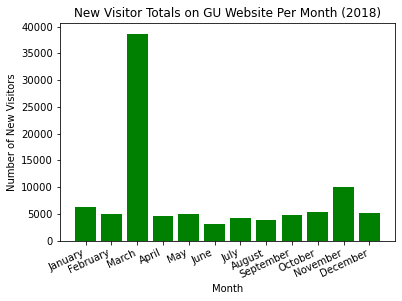

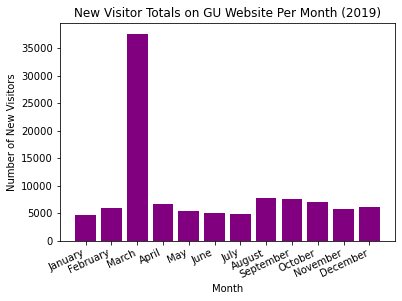

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

website_visitors_df = pd.read_csv("GU_website_daily_visitors_2018-2022.csv")

# Clean the data to visualize the number of visitors per month
date_ser = pd.Series(website_visitors_df["Date"])
month_dict = {"-01-": "January", "-02-": "February", "-03-": "March", "-04-": "April", 
              "-05-": "May", "-06-": "June", "-07-": "July", "-08-": "August", "-09-": "September", 
              "-10-": "October", "-11-": "November", "-12-": "December"}

for i in range(len(date_ser)):
    for j in month_dict.keys():
        if j in date_ser[i]:
            date_ser[i] = month_dict[j]

bar_chart_df = website_visitors_df.copy()
bar_chart_df["Date"] = date_ser

# Visualize New Visitor totals during the year of 2018
date_2018_list = []
new_visitor_2018_list = []

for i in range(0, 364):
    date_2018_list.append(bar_chart_df.loc[i]["Date"])
    new_visitor_2018_list.append(bar_chart_df.loc[i]["New Visitor"])

plt.figure()
plt.bar(date_2018_list, new_visitor_2018_list, color="green")
plt.title("New Visitor Totals on GU Website Per Month (2018)")
plt.ylabel("Number of New Visitors")
plt.xlabel("Month")
plt.xticks(rotation=25, ha="right")
plt.show()

# Visualize New Visitor totals during the year of 2019
date_2019_list = []
new_visitor_2019_list = []

for i in range(365, 729):
    date_2019_list.append(bar_chart_df.loc[i]["Date"])
    new_visitor_2019_list.append(bar_chart_df.loc[i]["New Visitor"])

plt.figure()
plt.bar(date_2019_list, new_visitor_2019_list, color="purple")
plt.title("New Visitor Totals on GU Website Per Month (2019)")
plt.ylabel("Number of New Visitors")
plt.xlabel("Month")
plt.xticks(rotation=25, ha="right")
plt.show()

It is apparent from this basic bar chart that there is a significant increase in new visitors during the month of March, throughout different years. In order to provide statistical evidence to support this inference, a hypothesis test must be completed.

### Hypothesis Testing: March v. Other Months

Now that the histogram has revealed a little more about how the visits increase and decrease throughout the year, it is time to ask the question: Do new visitors appear on average more during the month of March compared to other months? A level of 0.025 signifcance will be used for this one-tailed, two independent sample hypothesis test.

Before the hypothesis test can be carried out, daily visitors in March and the other months must be stored in two separate datasets.

In [18]:
import pandas as pd

website_visitors_df = pd.read_csv("GU_website_daily_visitors_2018-2022.csv")

march_visitors_list = []
other_visitors_list = []

for i in range(len(website_visitors_df)):

    if "-03-" in website_visitors_df.loc[i]["Date"]:
        march_visitors_list.append(website_visitors_df.loc[i]["New Visitor"])
    
    else:
        other_visitors_list.append(website_visitors_df.loc[i]["New Visitor"])

march_visitors_ser = pd.Series(march_visitors_list)
other_visitors_ser = pd.Series(other_visitors_list)

print("March New Visitor n:", len(march_visitors_ser))
print("Other Month New Visitor n:", len(other_visitors_ser))

March New Visitor n: 147
Other Month New Visitor n: 1396


#### 1. Identify the Null and Alternative Hypothesis

$H_o$ = $\mu_{March}$ <= $\mu_{Other}$  
$H_1$ = $\mu_{March}$ > $\mu_{Other}$  
$\mu$ = average daily new visitor count on GU website

#### 2. Select Level of Significance

$\alpha$ = 0.025

#### 3. Select Appropriate Test Statistic

T-Statistic for Two-Sample Independent Test of Means:
$$t = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{s^2_p(\frac{1}{n_1} + \frac{1}{n_2})}}$$

Pooled Variance:
$$s^2_p = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$

Degrees of Freedom:
$$df = n_1 + n_2 - 1$$

T-Critical @ $\alpha = 0.025$ and $df = 1541$
$$t_{critical} = 1.9615$$

In [19]:
from scipy import stats

t, pval = stats.ttest_ind(march_visitors_ser, other_visitors_ser)
pval /= 2
print("t:", t, "pval:", pval)

t: 8.54400625571796 pval: 1.5336684468397208e-17


#### 4. Formulate a Decision Rule

Using the t-distribution table with the level of significance (0.025) and the degrees of freedom (1541), the t-critical value for this hypothesis test is 1.9615. The decision rule can be checked using the computed t-value or p-value. The following conditions can be drawn up using the initial hypotheses:

1. If t-computed > 1.9615, reject $H_o$.
1. If t-computed <= 1.9615, do not reject $H_o$.

Python logic can demonstrate the above tests:

In [20]:
if t > 1.9615: 
    print("Reject the Null Hypothesis")
    
elif t <= 1.9615:
    print("Do Not Reject Null Hypothesis")

Reject the Null Hypothesis


#### 5. Make a Decision

Given a level of significance of 0.025, the hypothesis that the average daily new visitors on Gonzaga's website is less than or equal in the month of March compared to other months can be rejected. This means that there is evidence that supports a spike in new visitors during the month of March compared to other months.

### Conclusion

Given this hypothesis testing, it is apparent that there is a spike in new visitors during the month of March, as predicted. Likewise, hypothesis tests such as this one can be applied to test other theories or inferences as to why Gonzaga sees increased viewership during certain months. Could Fall admissions play a similar role in increasing daily visitors during the months of August and September? If so, how does this increase compare to that of the month of March? Moreover, how do the returning visitors and new visitors split in these spikes of visitors? This hypothesis test that was conducted only scratches the surface of the immense possibilities that can be questioned from this large dataset.